## 1.Load Packages

In [2]:
import scvelo as scv
import scanpy as sc
import pandas as pd

In [3]:
sc.settings.set_figure_params(dpi=200, facecolor="white", figsize=(5, 5))
scv.settings.set_figure_params(dpi=200, facecolor="white", figsize=(5, 5))

## 2.Load data

In [4]:
adata = scv.read('./tmp/ldata_Myeloid_sub2.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 3622 × 37487
    obs: 'patient', 'barcode', 'group', 'patient_id', 'cluster', 'UMAP1', 'UMAP2'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'


In [ ]:
# adata_sub = adata[~adata.obs['cluster'].isin([0, 3, 7, 9])].copy()
# adata = adata[adata.obs['cluster'].isin([1,5,6,10]), :]
# adata = adata[adata.obs['cluster'].isin([4,8,12,13]), :]
adata = adata[adata.obs['cluster'].isin([0,3,7,9]), :]
print(adata)
print(adata.obs["cluster"].unique())

## 3.Preprocess

In [5]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_pcs=50, n_neighbors=30)

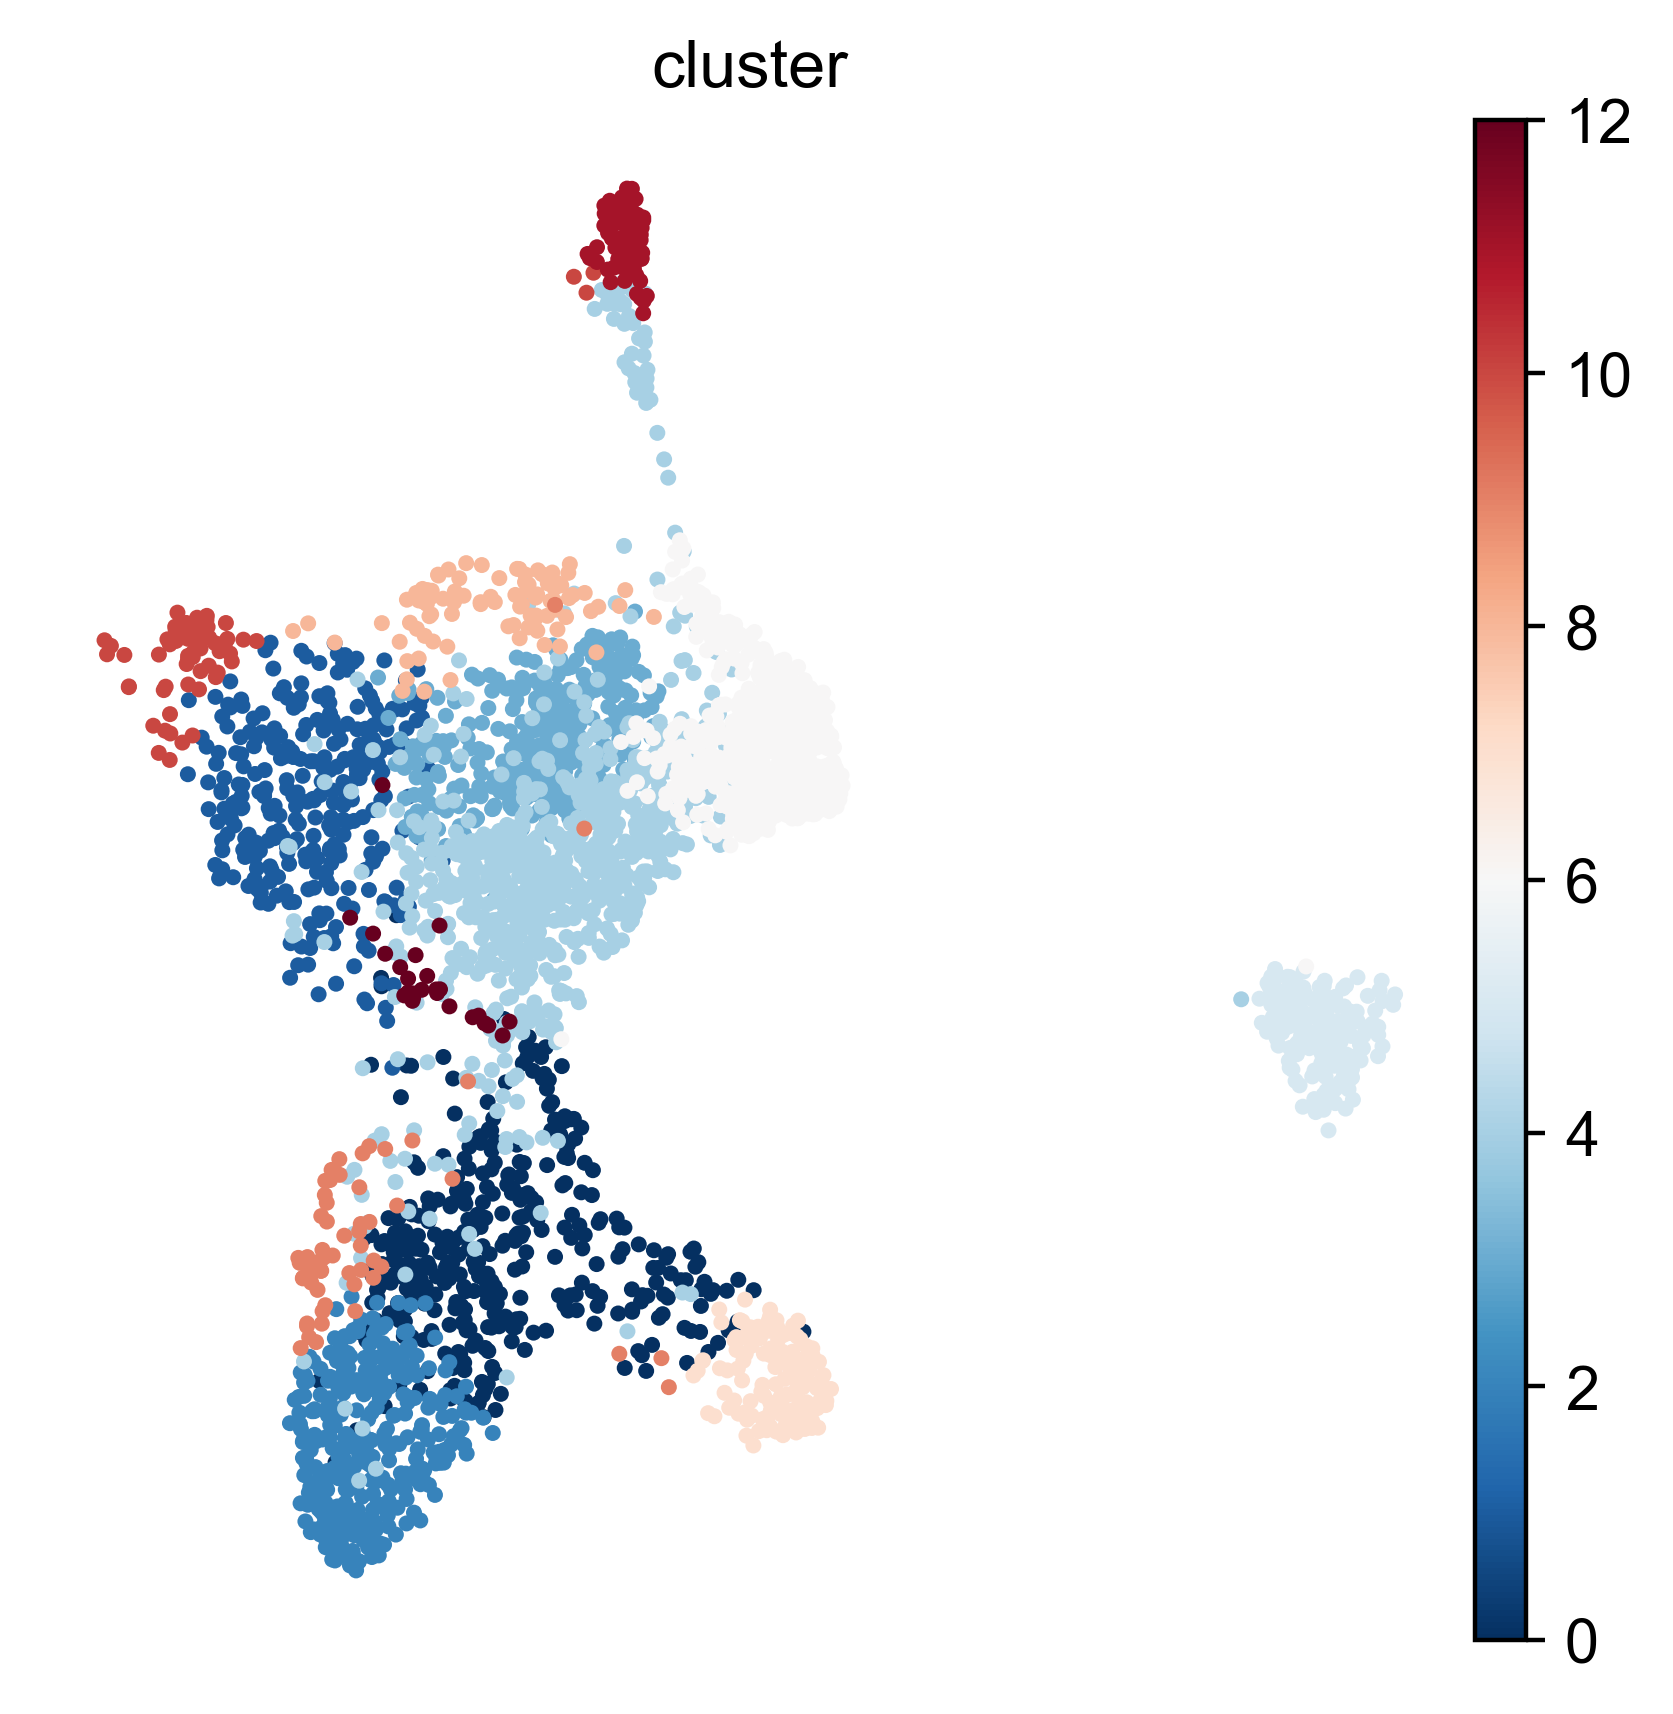

In [6]:
sc.pl.umap(adata, color='cluster', frameon=False, legend_loc='on data')

# 4.Compute

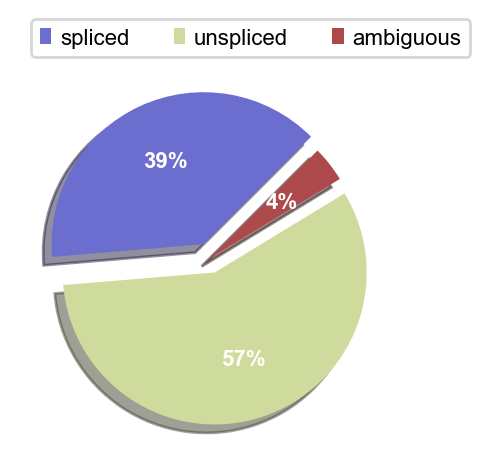

In [7]:
scv.pl.proportions(adata, figsize=(6, 2.5), dpi=100)

In [8]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing moments based on connectivities


d:\software\anaconda3\Lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [12]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities


d:\software\anaconda3\Lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/3622 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


# 5.Plot

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and wi

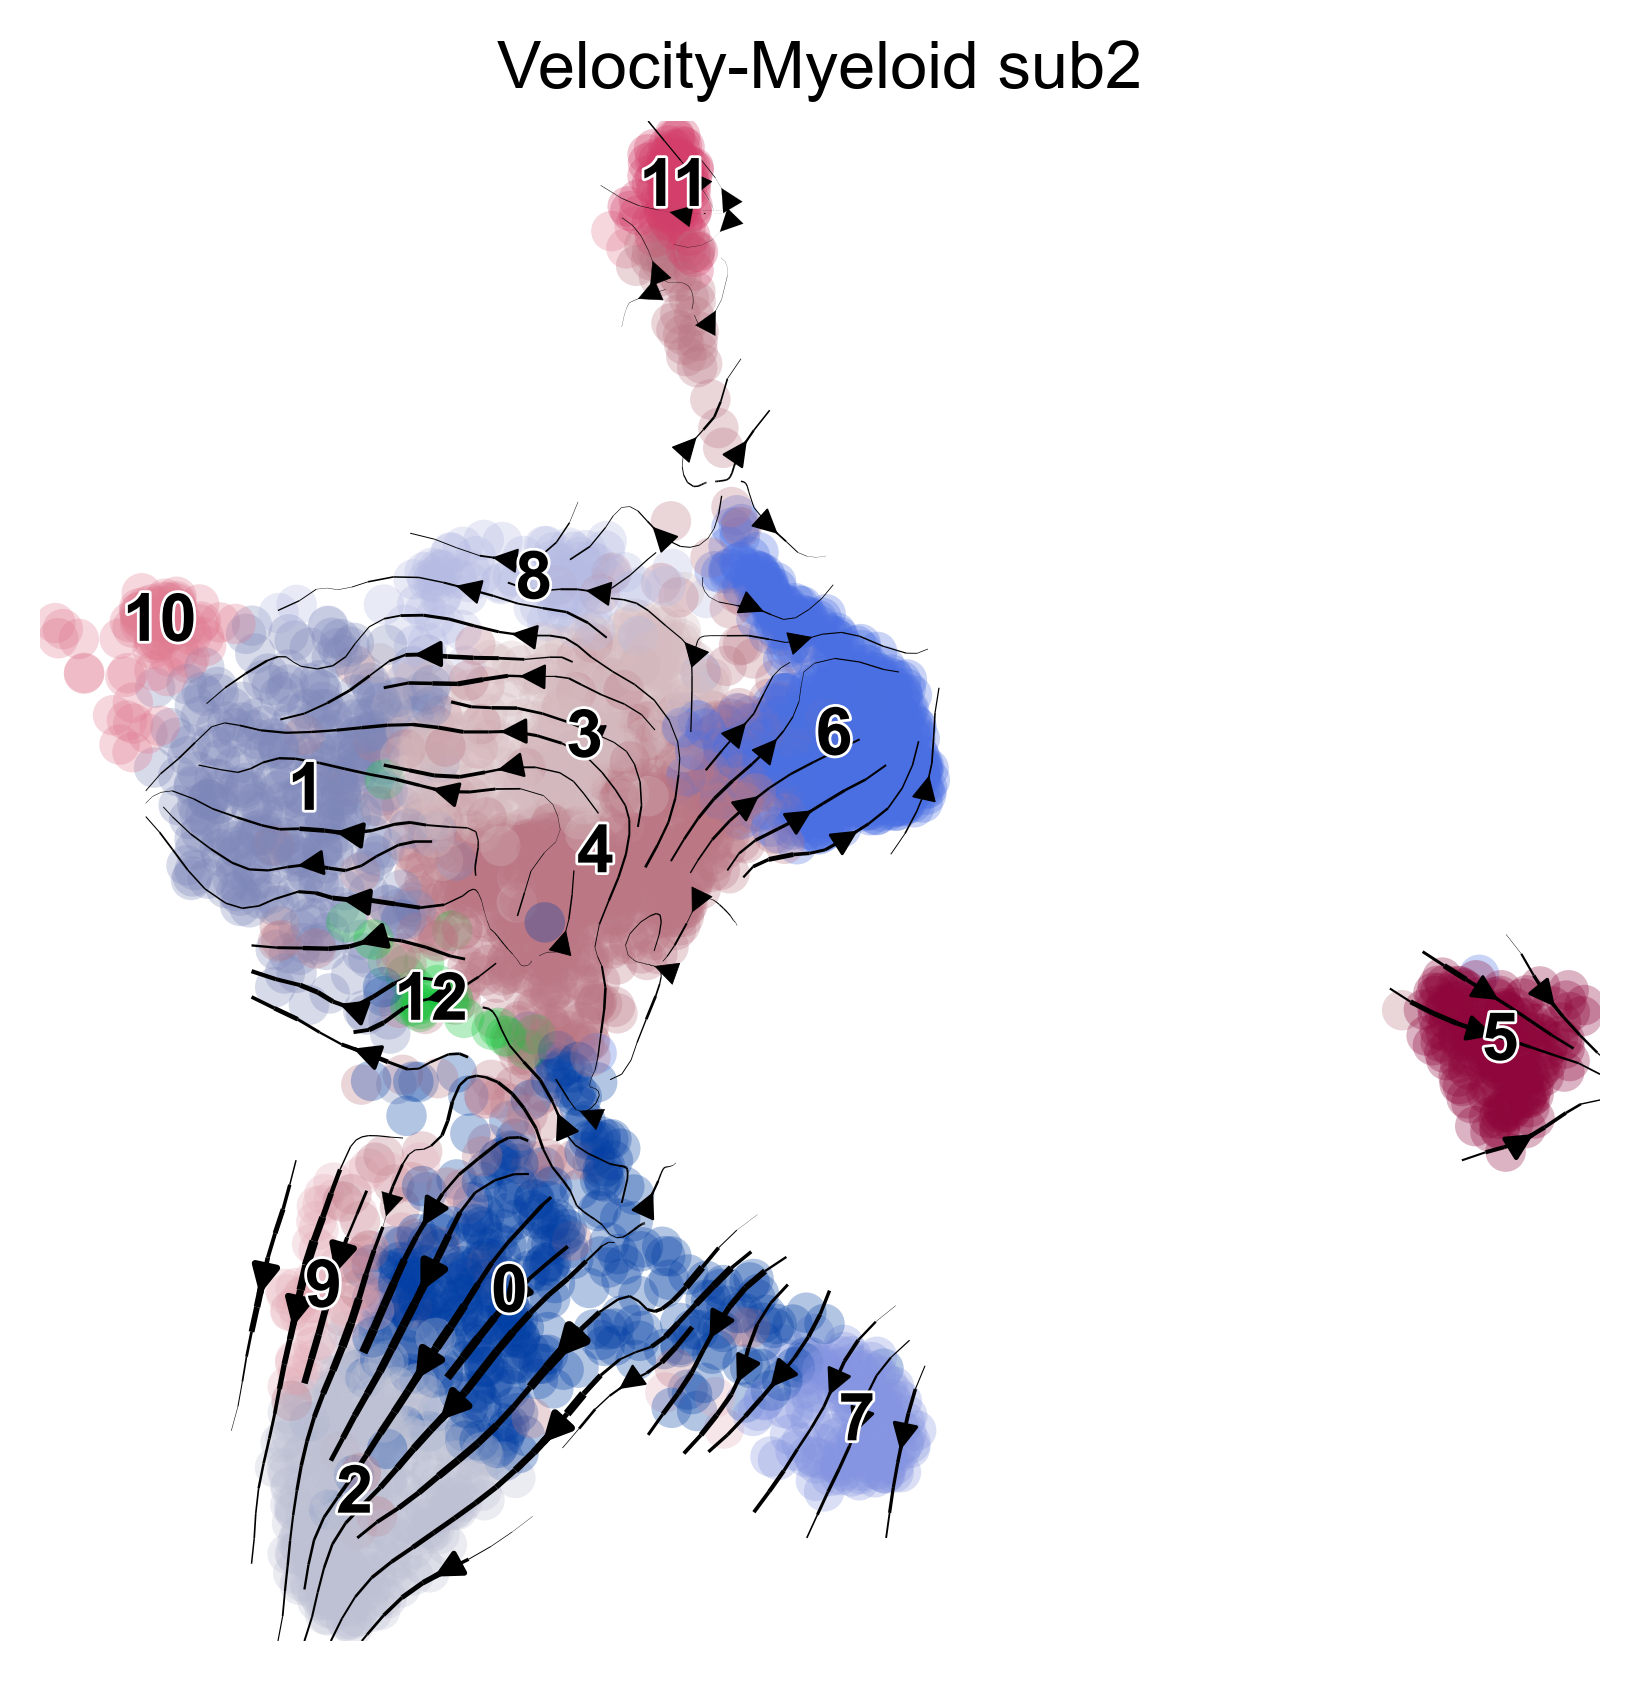

In [13]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color="cluster", title="Velocity-Myeloid_sub2")